## HW3: Decision Tree, AdaBoost and Random Forest
In hw3, you need to implement decision tree, adaboost and random forest by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.tree.DecisionTreeClassifier

## Load data
The dataset is the Heart Disease Data Set from UCI Machine Learning Repository. It is a binary classifiation dataset, the label is stored in `target` column. **Please note that there exist categorical features which need to be [one-hot encoding](https://www.datacamp.com/community/tutorials/categorical-data) before fit into your model!**
See follow links for more information
https://archive.ics.uci.edu/ml/datasets/heart+Disease

In [1]:
import pandas as pd
import numpy as np
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(file_url)

# find noise
# noise_list = []
# for i in range(df.shape[0]):
#     if df['thal'][i] == '1' or df['thal'][i] == '2':
#         noise_list.append(i)
# print ('noise index: ', noise_list)
# df = df.drop(noise_list)

# # one-hot encoding
# df_ohe = df.copy()
# df_ohe = pd.get_dummies(df_ohe, columns=['thal'], prefix = ['thal'])
# df_ohe.head()

# # change the order (move target to last)
# df_ohe_target = df_ohe['target']
# df_ohe = df_ohe.drop(['target'], axis = 1)
# df_ohe = df_ohe.assign(target=df_ohe_target)
# df_ohe.head()

In [2]:
train_idx = np.load('train_idx.npy')
test_idx = np.load('test_idx.npy')
# train_idx = np.setdiff1d(train_idx, noise_list)  # delete noise
# test_idx = np.setdiff1d(test_idx, noise_list)    # delete noise

train_df = df.iloc[train_idx]
test_df = df.iloc[test_idx]

# one-hot encoding
train_df_ohe = train_df.copy()
train_df_ohe = pd.get_dummies(train_df_ohe, columns=['thal'], prefix = ['thal'])
test_df_ohe = test_df.copy()
test_df_ohe = pd.get_dummies(test_df_ohe, columns=['thal'], prefix = ['thal'])

# change the order (move target to last)
train_df_ohe_target = train_df_ohe['target']
train_df_ohe = train_df_ohe.drop(['target'], axis = 1)
train_df_ohe = train_df_ohe.assign(target=train_df_ohe_target)
test_df_ohe_target = test_df_ohe['target']
test_df_ohe = test_df_ohe.drop(['target'], axis = 1)
test_df_ohe = test_df_ohe.assign(target=test_df_ohe_target)

In [3]:
train_df_ohe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal_fixed,thal_normal,thal_reversible,target
136,54,1,2,192,283,0,2,195,0,0.0,1,1,0,0,1,0
232,58,0,4,170,225,1,2,146,1,2.8,2,2,1,0,0,1
233,56,1,2,130,221,0,2,163,0,0.0,1,0,0,0,1,0
184,46,1,4,120,249,0,2,144,0,0.8,1,0,0,0,1,0
84,55,0,2,135,250,0,2,161,0,1.4,2,0,0,1,0,0


In [4]:
X_train = train_df_ohe.iloc[:,:-1].values
y_train = train_df_ohe.iloc[:,-1:].values
X_test = test_df_ohe.iloc[:,:-1].values
y_test = test_df_ohe.iloc[:,-1:].values
X_train

array([[54.,  1.,  2., ...,  0.,  0.,  1.],
       [58.,  0.,  4., ...,  1.,  0.,  0.],
       [56.,  1.,  2., ...,  0.,  0.,  1.],
       ...,
       [64.,  1.,  1., ...,  0.,  0.,  1.],
       [44.,  1.,  3., ...,  0.,  1.,  0.],
       [57.,  1.,  3., ...,  0.,  1.,  0.]])

## Question 1
Gini Index or Entropy is often used for measuring the “best” splitting of the data. Please compute the Entropy and Gini Index of provided data. Please use the formula from [page 5 of hw3 slides](https://docs.google.com/presentation/d/1kIe_-YZdemRMmr_3xDy-l0OS2EcLgDH7Uan14tlU5KE/edit#slide=id.gd542a5ff75_0_15)

In [5]:
# def gini(sequence): 
#     # if only 1 sample in a leaf, return 0
#     n = sequence.shape[0]
#     if n <= 1:
#         return 0
    
#     counts = np.bincount(sequence)
#     probs = counts[np.nonzero(counts)] / n
    
#     # if all samples are the same class, return 0
#     n_classes = len(probs)
#     if n_classes <= 1:
#         return 0
    
#     g = 1 - np.sum(probs * probs.T)
#     return g

# def entropy(sequence):
#     # if only 1 sample in a leaf, return 0
#     n = sequence.shape[0]
#     if n <= 1:
#         return 0
    
#     counts = np.bincount(sequence)
#     probs = counts[np.nonzero(counts)] / n
    
#     # if all samples are the same class, return 0
#     n_classes = len(probs)
#     if n_classes <= 1:
#         return 0
    
#     e = - np.sum(probs * np.log(probs) / np.log(2))
#     return e

def gini(sequence):
    _, cnt = np.unique(sequence, return_counts=True)
    prob = cnt / sequence.shape[0]
    g = 1 - np.sum([p**2 for p in prob])
    return g


def entropy(sequence):
    _, cnt = np.unique(sequence, return_counts=True)
    prob = cnt / sequence.shape[0]
    e = -1 * np.sum([p*np.log2(p) for p in prob])
    return e

In [6]:
# 1 = class 1,
# 2 = class 2
data = np.array([1,2,1,1,1,1,2,2,1,1,2])

In [7]:
print("Gini of data is ", gini(data))

Gini of data is  0.4628099173553719


In [8]:
print("Entropy of data is ", entropy(data))

Entropy of data is  0.9456603046006401


## Question 2
Implement the Decision Tree algorithm (CART, Classification and Regression Trees) and trained the model by the given arguments, and print the accuracy score on the test data. You should implement two arguments for the Decision Tree algorithm
1. **criterion**: The function to measure the quality of a split. Your model should support `gini` for the Gini impurity and `entropy` for the information gain. 
2. **max_depth**: The maximum depth of the tree. If `max_depth=None`, then nodes are expanded until all leaves are pure. `max_depth=1` equals to split data once


In [9]:
class DecisionTree():
    def __init__(self, criterion='gini', max_depth=None):
        self.criterion = criterion  # Setting the evaluation function (gini / entropy)
        if criterion == 'gini':
            self.measure_func = gini
        else:
            self.measure_func = entropy
        self.max_depth = max_depth  # Setting the max depth of the tree
        self.root = None
        self.total_fi = None
        return None

    class Node():
        def __init__(self):
            self.feature = None
            self.thres = None
            self.impurity = None
            self.data_num = None
            self.left = None
            self.right = None
            self.predict_class = None

    def get_thres(self, data):
        thres = None
        feature = None
        min_impurity = 1e10
        (n, dim) = data.shape
        dim -= 1
        for i in range(dim):
            data_sorted = np.asarray(sorted(data, key=lambda t: t[i]))
            for j in range(1, n):
                t = (data_sorted[j - 1, i] + data_sorted[j, i]) / 2
                left_data = data_sorted[data_sorted[:, i] < t]
                right_data = data_sorted[data_sorted[:, i] >= t]
                left_impurity = self.measure_func(left_data[:, -1].astype(np.int32))
                right_impurity = self.measure_func(right_data[:, -1].astype(np.int32))
                impurity = left_data.shape[0] * left_impurity
                impurity += right_data.shape[0] * right_impurity
                impurity /= data_sorted.shape[0]
                if impurity <= min_impurity:
                    min_impurity = impurity
                    thres = t
                    feature = i
        return feature, thres, min_impurity

    def build_tree(self, data, depth=None):
        node = self.Node()
        if self.measure_func(data[:, -1].astype(np.int32)) == 0:
            node.predict_class = int(data[0, -1])
        elif depth == 0:
            label, cnt = np.unique(data[:, -1].astype(np.int32), return_counts=True)
            node.predict_class = label[np.argmax(cnt)]
        else:
            feature, thres, impurity = self.get_thres(data)
            node.feature = feature
            node.thres = thres
            node.impurity = impurity
            node.data_num = data.shape[0]
            left_data = data[data[:, feature] < thres]
            right_data = data[data[:, feature] >= thres]
            if depth is None:
                if len(left_data) == 0:       # if no element in the leaf, return 0. (only left will occur)
                    node.predict_class = 0
                else:
                    checkSame = []
                    for i in range(left_data.shape[0] - 1):
                        if (left_data[i][:-1] == left_data[i+1][:-1]).all():
                            checkSame.append(True)
                        else:
                            checkSame.append(False)
                    if all(checkSame) == True:
                        label, cnt = np.unique(left_data[:, -1].astype(np.int32), return_counts=True)
                        node.predict_class = label[np.argmax(cnt)]
                    else:
                        node.left = self.build_tree(left_data)
                    checkSame = []
                    for i in range(right_data.shape[0] - 1):
                        if (right_data[i][:-1] == right_data[i + 1][:-1]).all():
                            checkSame.append(True)
                        else:
                            checkSame.append(False)
                    if all(checkSame) == True:
                        label, cnt = np.unique(right_data[:, -1].astype(np.int32), return_counts=True)
                        node.predict_class = label[np.argmax(cnt)]
                    else:
                        node.right = self.build_tree(right_data)

            else:
                if len(left_data) == 0:       # if no element in the leaf, return 0. (only left will occur)
                    node.predict_class = 0
                else:
                    checkSame = []            # check whether the elements are the same, if True, pick the highest prob. (for random forest)
                    for i in range(left_data.shape[0] - 1):
                        if (left_data[i][:-1] == left_data[i + 1][:-1]).all():
                            checkSame.append(True)
                        else:
                            checkSame.append(False)
                    if all(checkSame) == True:
                        label, cnt = np.unique(left_data[:, -1].astype(np.int32), return_counts=True)
                        node.predict_class = label[np.argmax(cnt)]
                    else:
                        node.left = self.build_tree(left_data, depth-1)
                checkSame = []
                for i in range(right_data.shape[0] - 1):
                    if (right_data[i][:-1] == right_data[i + 1][:-1]).all():
                        checkSame.append(True)
                    else:
                        checkSame.append(False)
                if all(checkSame) == True:
                    label, cnt = np.unique(right_data[:, -1].astype(np.int32), return_counts=True)
                    node.predict_class = label[np.argmax(cnt)]
                else:
                    node.right = self.build_tree(right_data, depth-1)
        return node

    def train(self, X, y):
        data = np.hstack((X, y))
        self.root = self.build_tree(data, self.max_depth)

    def traverse(self, node, X):
        if node.predict_class is not None:
            return node.predict_class
        else:
            if X[node.feature] < node.thres:
                return self.traverse(node.left, X)
            else:
                return self.traverse(node.right, X)

    def print_acc(self, acc):
        print(f'criterion = {self.criterion}')
        print(f'max depth = {self.max_depth}')
        print(f'acc       = {acc}')
        print('====================')

    def predict(self, X, y=None):
        pred = np.zeros(X.shape[0]).astype(np.int32)
        correct = 0
        for i in range(X.shape[0]):
            pred[i] = self.traverse(self.root, X[i])
            if y is not None:
                if pred[i] == y[i, 0]:
                    correct += 1
        acc = correct / X.shape[0] if y is not None else None
        self.print_acc(acc)
        return pred, acc

    def get_fi(self, node):
        if node.left and node.left.impurity is not None:
            self.get_fi(node.left)
        if node.right and node.right.impurity is not None:
            self.get_fi(node.right)
        self.total_fi[node.feature] += 1

    def feature_importance(self):
        self.total_fi = np.zeros(len(feature_names))
        self.get_fi(self.root)
        return self.total_fi

    def print_tree(self, node, ident):
        if node.predict_class is not None:
            print(f'{ident}Predict {node.predict_class}')
        else:
            print(f'{ident}{node.feature} >= {node.thres}')
            print(f'{ident}--> True:')
            self.print_tree(node.right, ident + '  ')
            print(f'{ident}--> False:')
            self.print_tree(node.left, ident + '  ')

### Question 2.1
Using `criterion=gini`, showing the accuracy score of test data by `max_depth=3` and `max_depth=10`, respectively.


In [10]:
clf_depth3 = DecisionTree(criterion='gini', max_depth=3)
clf_depth3.train(X_train, y_train)
_, acc = clf_depth3.predict(X_test, y_test)

clf_depth10 = DecisionTree(criterion='gini', max_depth=10)
clf_depth10.train(X_train, y_train)
_, acc = clf_depth10.predict(X_test, y_test)

criterion = gini
max depth = 3
acc       = 0.81
criterion = gini
max depth = 10
acc       = 0.61


### Question 2.2
Using `max_depth=3`, showing the accuracy score of test data by `criterion=gini` and `criterion=entropy`, respectively.


In [11]:
clf_gini = DecisionTree(criterion='gini', max_depth=3)
clf_gini.train(X_train, y_train)
_, acc = clf_gini.predict(X_test, y_test)

clf_entropy = DecisionTree(criterion='entropy', max_depth=3)
clf_entropy.train(X_train, y_train)
_, acc = clf_entropy.predict(X_test, y_test)

criterion = gini
max depth = 3
acc       = 0.81
criterion = entropy
max depth = 3
acc       = 0.78


- Note: Your decisition tree scores should over **0.7**. It may suffer from overfitting, if so, you can tune the hyperparameter such as `max_depth`
- Note: You should get the same results when re-building the model with the same arguments,  no need to prune the trees
- Hint: You can use the recursive method to build the nodes


## Question 3
Plot the [feature importance](https://sefiks.com/2020/04/06/feature-importance-in-decision-trees/) of your Decision Tree model. You can get the feature importance by counting the feature used for splitting data.

- You can simply plot the **counts of feature used** for building tree without normalize the importance. Take the figure below as example, outlook feature has been used for splitting for almost 50 times. Therefore, it has the largest importance

![image](https://i2.wp.com/sefiks.com/wp-content/uploads/2020/04/c45-fi-results.jpg?w=481&ssl=1)

In [12]:
feature_names = train_df_ohe.columns
feature_names = feature_names.drop(['target'])
feature_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal_fixed', 'thal_normal',
       'thal_reversible'],
      dtype='object')

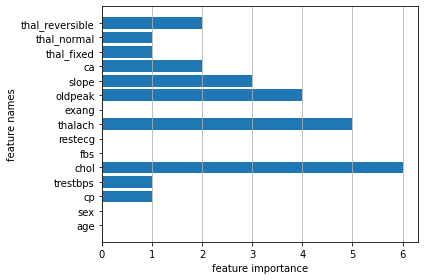

In [13]:
import matplotlib.pyplot as plt

fi = clf_depth10.feature_importance()

x_pos = [i for i, _ in enumerate(feature_names)]
plt.barh(x_pos, fi)
plt.ylabel('feature names')
plt.xlabel('feature importance')
plt.xticks(np.arange(max(fi)+1))
plt.yticks(x_pos, feature_names)
plt.gca().grid(axis='x', which='major')
plt.tight_layout()
# plt.savefig('fi.png', dpi=300, transparent=True)
plt.show()

## Question 4
implement the AdaBooest algorithm by using the CART you just implemented from question 2 as base learner. You should implement one arguments for the AdaBooest.
1. **n_estimators**: The maximum number of estimators at which boosting is terminated

In [14]:
class AdaBoost():
    def __init__(self, n_estimators):
        return None

### Question 4.1
Show the accuracy score of test data by `n_estimators=10` and `n_estimators=100`, respectively.


## Question 5
implement the Random Forest algorithm by using the CART you just implemented from question 2. You should implement three arguments for the Random Forest.

1. **n_estimators**: The number of trees in the forest. 
2. **max_features**: The number of random select features to consider when looking for the best split
3. **bootstrap**: Whether bootstrap samples are used when building tree


In [15]:
# import sys
# print(sys.getrecursionlimit())
# sys.setrecursionlimit(10000)

import random
random.seed(2)

class RandomForest():
    def __init__(self, n_estimators, max_features, boostrap=True, criterion='gini', max_depth=None):
        self.n_estimators = n_estimators
        self.max_features = int(np.round(max_features))
        self.boostrap = boostrap
        self.criterion = criterion
        self.max_depth = max_depth
        self.clfs = []
        for i in range(self.n_estimators):
            self.clfs.append(DecisionTree(self.criterion, self.max_depth))
        self.random_vecs = []
        return None
    
    def train(self, X, y):
        for i in range(self.n_estimators):
            random_vec = random.sample(range(X.shape[1]), self.max_features)
            self.random_vecs.append(random_vec)
            if self.boostrap:
                sample_num = int(np.round(X.shape[0]*2/3))
                subset_idx = random.sample(range(X.shape[0]), sample_num)
                self.clfs[i].train(X[subset_idx][:, random_vec], y[subset_idx])
            else:
                self.clfs[i].train(X[:, random_vec], y)
            # print(f'{i+1} trees completed')

    def print_acc(self, acc):
        print(f'n estimators = {self.n_estimators}')
        print(f'max features = {self.max_features}')
        print(f'boostrap     = {self.boostrap}')
        print(f'criterion    = {self.criterion}')
        print(f'max depth    = {self.max_depth}')
        print(f'acc          = {acc}')
        print('====================')

    def predict(self, X, y=None):
        pred = np.zeros(X.shape[0]).astype(np.int32)
        correct = 0
        for i in range(X.shape[0]):
            vote = []
            for j in range(self.n_estimators):
                vote.append(self.clfs[j].traverse(self.clfs[j].root, X[i, self.random_vecs[j]]))
            label, cnt = np.unique(vote, return_counts=True)
            pred[i] = label[np.argmax(cnt)]
            if y is not None:
                if pred[i] == y[i, 0]:
                    correct += 1
        acc = correct / X.shape[0] if y is not None else None
        self.print_acc(acc)
        return pred, acc

### Question 5.1
Using `criterion=gini`, `max_depth=None`, `max_features=sqrt(n_features)`, showing the accuracy score of test data by `n_estimators=10` and `n_estimators=100`, respectively.


In [16]:
clf_10tree = RandomForest(n_estimators=10, max_features=np.sqrt(X_train.shape[1]))
clf_10tree.train(X_train, y_train)
_, acc = clf_10tree.predict(X_test, y_test)
    
clf_100tree = RandomForest(n_estimators=100, max_features=np.sqrt(X_train.shape[1]))
clf_100tree.train(X_train, y_train)
_, acc = clf_100tree.predict(X_test, y_test)

n estimators = 10
max features = 4
boostrap     = True
criterion    = gini
max depth    = None
acc          = 0.78
n estimators = 100
max features = 4
boostrap     = True
criterion    = gini
max depth    = None
acc          = 0.79


### Question 5.2
Using `criterion=gini`, `max_depth=None`, `n_estimators=10`, showing the accuracy score of test data by `max_features=sqrt(n_features)` and `max_features=n_features`, respectively.


In [17]:
clf_random_features = RandomForest(n_estimators=10, max_features=np.sqrt(X_train.shape[1]))
clf_random_features.train(X_train, y_train)
_, acc = clf_random_features.predict(X_test, y_test)

clf_all_features = RandomForest(n_estimators=10, max_features=X_train.shape[1])
clf_all_features.train(X_train, y_train)
_, acc = clf_all_features.predict(X_test, y_test)

n estimators = 10
max features = 4
boostrap     = True
criterion    = gini
max depth    = None
acc          = 0.77
n estimators = 10
max features = 15
boostrap     = True
criterion    = gini
max depth    = None
acc          = 0.62


- Note: Use majority votes to get the final prediction, you may get slightly different results when re-building the random forest model

### Question 6.
Try you best to get highest test accuracy score by 
- Feature engineering
- Hyperparameter tuning
- Implement any other ensemble methods, such as gradient boosting. Please note that you cannot call any package. Also, only ensemble method can be used. Neural network method is not allowed to used.

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
y_test = test_df['target']

In [20]:
y_pred = your_model.predict(x_test)

NameError: name 'your_model' is not defined

In [ ]:
print('Test-set accuarcy score: ', accuracy_score(y_test, y_pred))

## Supplementary
If you have trouble to implement this homework, TA strongly recommend watching [this video](https://www.youtube.com/watch?v=LDRbO9a6XPU), which explains Decision Tree model clearly. But don't copy code from any resources, try to finish this homework by yourself! 